# Scraping Java vs Python Jobs

Description: We're going to use indeed.com and scrape job links for "Software Engineer" roles. We will then scrape each of those links' content and search for the keyword "Java" and "Python" in the contents. We will then plot the occurences of Java vs Python.

In [85]:
import bs4
import urllib.request

#Scraping first page
url = "https://www.indeed.com/jobs?q=Software+Engineer&l="
soup = bs4.BeautifulSoup(urllib.request.urlopen(url).read())
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/00314c1/en_US.js" type="text/javascript">
  </script>
  <script>
   window.indeed=window.indeed||{};indeed.crashtext=indeed.crashtext||{};indeed.crashtext.populate=indeed.crashtext.populate||function(c,g){var d=window[g];if(d){var e=d[""]||{},h=e.salt;if(e.hasOwnProperty("salt"))for(var b in c){for(var a=void 0,a=h,f=b.length;f;)a=33*a^b.charCodeAt(--f);a>>>=0;e.hasOwnProperty("id_length")&&(a=String(a).substring(0,e.id_length));d[a]=c[b]}else for(b in c)d[b]=[null].concat(c[b])}};indeed.crashtext.populate({"City, state, or zip code":["City, state, zip code, or &quot;remote&quot;"]}, 'indeed.i18n.localeData')
  </script>
  <link href="/s/b512638/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=Software+Engineer" rel="alternate" title="Software Engineer Jobs, Employment" type="application/rss+xml"/>
  <l

In [152]:
#Reading job links
#/html/body/table[2]/tbody/tr/td/table/tbody/tr/td[1]/div[5]
#19 jobs per page, each a with id "sja" + 0-18 ,except 7-16, so we can expect 9 per page

jobLinks = []
for p in range (30):
    if p != 0:
        url = "https://www.indeed.com/jobs?q=Software+Engineer&start=" + str(p*10)
        soup = bs4.BeautifulSoup(urllib.request.urlopen(url).read())
    for i in range (19):
        jobCard = soup.find("a", {"id": "sja" + str(i)})
        if jobCard is not None:
            jobLinks += ["https://www.indeed.com" + jobCard.get("href")]
            print(str(p) +"," + str(i))

#found 263 jobs (inconsistency amongst html pages), May 16 2020

0,10
0,11
0,12
0,13
0,14
0,15
0,16
0,17
1,0
1,1
1,2
1,3
1,4
1,5
1,6
1,17
1,18
2,0
2,1
2,2
2,3
2,4
2,5
2,16
2,17
2,18
3,0
3,1
3,2
3,3
3,4
3,5
3,16
3,17
3,18
4,10
4,11
4,12
4,13
4,14
4,15
4,16
4,17
4,18
5,10
5,11
5,12
5,13
5,14
5,15
5,16
5,17
5,18
6,10
6,11
6,12
6,13
6,14
6,15
6,16
6,17
6,18
7,10
7,11
7,12
7,13
7,14
7,15
7,16
7,17
7,18
8,0
8,11
8,12
8,13
8,14
8,15
8,16
8,17
8,18
9,10
9,11
9,12
9,13
9,14
9,15
9,16
9,17
10,10
10,11
10,12
10,13
10,14
10,15
10,16
10,17
11,10
11,11
11,12
11,13
11,14
11,15
11,16
11,17
12,10
12,11
12,12
12,13
12,14
12,15
12,16
12,17
13,10
13,11
13,12
13,13
13,14
13,15
13,16
13,17
13,18
14,10
14,11
14,12
14,13
14,14
14,15
14,16
14,17
15,0
15,11
15,12
15,13
15,14
15,15
15,16
15,17
16,0
16,11
16,12
16,13
16,14
16,15
16,16
16,17
16,18
17,10
17,11
17,12
17,13
17,14
17,15
17,16
17,17
17,18
18,10
18,11
18,12
18,13
18,14
18,15
18,16
18,17
18,18
19,0
19,1
19,2
19,13
19,14
19,15
19,16
19,17
19,18
20,10
20,11
20,12
20,13
20,14
20,15
20,16
20,17
20,18
21,0
21,11
21,12
21,1

In [178]:
#Total links
len(jobLinks)

263

In [176]:
#Checking whether each link mentions Java or Python
import re

mentions = {"java" : 0, "python" : 0}

c = 0
for link in jobLinks:
    print(c)
    print(link)
    siteText = str(urllib.request.urlopen(link).read()).lower()
    result = None
    result = re.search(r"\b" + re.escape("java") + r"\b", siteText)
    print(result)
    if result != None:
        mentions["java"] += 1
    result2 = None
    result2 = re.search(r"\b" + r"python" + r"\b(?!-)", siteText)
    print(result2)
    if result2 != None:
        mentions["python"] += 1
    c += 1
    print(mentions)


<re.Match object; span=(49, 53), match='java'>
0
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Duvs8W9J3ng6gJug0TleWEiZhMTn3xkaahiVgbeU0KWa83bM-aLqcknphclTZ3OXLVmz-GbQMxWHYR2OPHV9iCmcYA93lQo29BZV72W8V-Mwfzjwx2PCf74ZWiht12_MfOjE_YEVFXFT6d0k2wZhGQAkMBoYvH-Zx8bwMN-bL_-h5ar1yrPX31zUoLwSF05QXDrraT5mk1b08Rqitq2ofO-uCf0Zddf6cY8L8t87L5vIxe99haRMKAWEFh5hfLN0AzVlLzUcU-hWpe0_Cg7ewEzaLB4VXLgxtOnmG4eVNa_vxJaP9MMLiz-jF9yEthKrlbfQ84kqcHxNQJ-LTm8GFqtZ5VQLURfOj-M3fZ9a-8-vMlh7M-SpUWL8CH8sRsZVYRI-NrhuGGidDXmVWsvyc_0mFj5w6nIIvzRRNekaTaA77L_ScC-2A31OwFNlH0ejyO9ng1k6_h3CqSFnQ4rlBiZW2iR5a7DruKO68k9goaDgEg-alV1blV4M2NZ4SkP4TIyMk8vJXTlezr84LbOhd9&p=10&fvj=0&vjs=3
<re.Match object; span=(131292, 131296), match='java'>
<re.Match object; span=(131305, 131311), match='python'>
{'java': 1, 'python': 1}
1
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CAsVQNl2z0Eh8zRDIM_bFO44shXdtcrutrb3Ol-xLLn79u906JjgFqqF8weDVTuwR9SHyU0_LIv946UzZEjWa0ZiRKqUU7oqHFAJzl1RxNTkWa26BZdQ3m147U3K7J5MdnR36QoeZTHx04T6VolEghKG1vCf

<re.Match object; span=(131147, 131151), match='java'>
<re.Match object; span=(131160, 131166), match='python'>
{'java': 6, 'python': 3}
13
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CAsVQNl2z0Eh8zRDIM_bFO44shXdtcrutrb3Ol-xLLn_HTKHIZMH9y9wbY_5tUFwXgg141Db108HX6z8cQlmb7dJhUxdmNaKmnh-Sb6UpjIEbKE9C128g0dLN2Licm0u2mRoResvgRZxUBtNG-83Eci2t93ScJVDGxZyQzzZhPERaGuAXKqV7M6E7sQipA3z6TwIiAphZffuCnyNLQiK7NvlnLJ8zuw1OBANEMPTV-UJyuUgUhU0R1rmK4JHFXtaQeMpyW6HbyG2O0bSKpX_Y7eh51hkXe6pAUhY78Li6F7jw0m9rnMEabcyMdFAmbt2k6wt6IB7Dys8JWXky8UmYPlzBEe214vhQSumcq_rBXtQxJD0Fv9kllrmFXaU8vbJ0Li8LDOjPDs1EIs4XIiz1Ceh7OPuAQ7i2Tg_5xv5hbyLuhSRotWWfm1TloaBL7uzIGAt1kkPivdsGQFQ5V9Ye24TfnvITNT2wcvuyYU1oL1rVC43nS9lMTvTzPXMfV0HlomrG_ctC7Q8F_XtfFdiBN&p=5&fvj=0&vjs=3
None
None
{'java': 6, 'python': 3}
14
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AR-lnqOtBECWhpbQxGoaCu6E7J73FdnWu52W_QYsuKKgYpIGAytY6ImXVdBNsw7EfG2TxyssITMn1PfBRQdWp3kHWPOS9zpwsZ6JGQuKqYY-ndCLH5a1eWBIvhl8FSz8ohN1G8oKnLTryVCHwSWuygGC-5mk1TbwHuf0zR_

None
<re.Match object; span=(131406, 131412), match='python'>
{'java': 10, 'python': 7}
25
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DELqFn6ZfFqfxp8uXBvtvPyZRnpLJhXDfOKsALBd_xFpLxQMJl6x7B8OCuMGJXt7dzIL74PV3T0b4W5dTgqEcp7ZVb0fibSur7eJAOptGGZZ92HwqG-6RK3oeOhEhZSglMICcWfONQk75DYUeAARCty0wEt3X2FJg0AK-OhWpfy5UV59Zjd8GwFqD8M9IpruL7nFXj3-FDaMv-n3ycHzsh1YqXcJNcE3Syp6rnIBirkx90VOWyteTS31Tk9mreeFduwePWftvhZScFIfq0mCbXVVh8nedWo30U7Ns78ltRRMRvBsvYj2BJ2E8t54OKt3PQyLoH4wBQKC0M-ILyT5E9y90b-8U9jtVqmGRSiWu30Plf8u5PnIaJkTNc87QHZbX14rfI_Hxznd0mkXsBppm6pOhbnA_V7nW9pF_0bXpZTHhnON-r-c7NMpBwO7b5Q05RtHTLvRhMtw==&p=18&fvj=1&vjs=3
None
None
{'java': 10, 'python': 7}
26
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ATG-QT561I1pyQl8KLzosRSCrGy2Eh3y1IGbA_ZnmzuqzwluQxzDWg2f0N5aCiywSsOTTXwxcoSQqnIDlHktjvEqjrNyIgimwF_2z047tONGzKUsOAq5mcP5nzUKMgXB_IK84VH2a3sdhZigvRit8x0lOJlVjGLQkORZ5WqJLD1HAJuubBenmzKMLh_KvacWaepLrjYNt5FXyemUmiEsZf-agMyBtwbhJ_eHcXR6nxFoETlL0oR5mCvLU3Eie1Yrdyya8SDSpcqdDm4-8I5E2NRl2njqY4

None
<re.Match object; span=(130526, 130532), match='python'>
{'java': 15, 'python': 12}
38
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9CE572HoIBzjTozchv3QrfVeNVhstl9PnkG4ZScSmZjnLOH1zgFTsothFBvszDKOYN4DUjItfitExmF7NZwawKqszVDIicp7qvIcgt3aylZ_Z0Oi368bwKVLIj3nG5rCjnuDEVBGTgg3ab4v-3oddrtoO7E1KW5pvFCOfeRSwwHFmLvfLVvOKbJL2ZaAaJM1fLkcHapFXI-p8F2nQJWaDvhg9w87iBYFunh31lMODQMkRHXWHF_CQsdCSBT-9XIUu03vub-PQgItvsg6-z3HsxmGz4rxeyX7WNZxd45nz3dTJWzgecJKSUG65J9yefLRIBx4YUydDoKBNIpQGhF3Mch8rkYut_RoYEt1964jDN1IMgif-skOGv_KYxuvwjbqH0cBOPIG2pbEuDasXCBdtshn6chA14cCfqpFoeyObR8r17avAe9h3eRhYeILT-aALGw0ng_rA--UEnq08XCwS6vhwcGaRL3rTthhAnSLCb7DnI3BW_o=&p=13&fvj=1&vjs=3
None
<re.Match object; span=(217208, 217214), match='python'>
{'java': 15, 'python': 13}
39
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ATG-QT561I1pyQl8KLzosRSCrGy2Eh3y1IGbA_ZnmzuqzwluQxzDWg2f0N5aCiywSsOTTXwxcoSQqnIDlHktjvEqjrNyIgimwF_2z047tONGzKUsOAq5mcP5nzUKMgXB_IK84VH2a3sdhZigvRit8x0lOJlVjGLQm-C_MNGpLG8XlsblAiOo

None
None
{'java': 20, 'python': 16}
50
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CpKUphcfUvUJpqypgZqSHFYfjpxCtKQgLiDFfRuZ1gIXXNb1clBCpf6FVuPKwgJ7LU_6vX6dkTgiYtNFU2y0LhqK_4srZ4OWVoOaefUi7D_dLNR1lA0NlcbVluvIVodgmW76iN0LZKiG61vyUjpsKrprvuHZi5_fOLB-wxGtcxZmZULUV4GvHd9iXdvAmw-GBgZocSHP2KDb1_e3JVWOQd8j4SwBMcLp7fueziXCccvk65RqzOdrM5G6h9Ppe-JBq1ZtbYXHvkFvAp76sUWRV-DoHeVnHP91nYgteWU95R406uxG_7Vbiuw4I9x2phudpnIQsrDN0oepZKwMcJS2xKBkPMDmwxSr1Kmk2KJcuBvoi0sD3q13dT4_POEX37svM8UTfzANehSJJhN2cy6gHyUgQELuHFwdjJ-t0B4YLq3-zGxoSCTOLmZ9iut1CTAZQrpDNJBCCXVg==&p=16&fvj=1&vjs=3
None
None
{'java': 20, 'python': 16}
51
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ATG-QT561I1pyQl8KLzosRSCrGy2Eh3y1IGbA_ZnmzuqzwluQxzDWg2f0N5aCiywSsOTTXwxcoSQqnIDlHktjvEqjrNyIgimwF_2z047tONGzKUsOAq5mcP5nzUKMgXB_IK84VH2a3sdhZigvRit8x0lOJlVjGLQlU44TQQerRPqkowHVcDqtFLIFkkaHESMAPxPkAmrnLUjGywT5VR2ZDmYyOq6VES5PsCnm8ClsL5JOv7yZZTJ73UqZ0tY5EQrkClVOMHlNH7lkSCcvQaUsbUlgoLoIbtH38RcSsha9koJw7Eq_B9B4xhzELTsyb5BStPftOvF-C7-nKdF

<re.Match object; span=(130720, 130724), match='java'>
None
{'java': 27, 'python': 20}
62
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BrkGAw7VGTTnqsFJf6dWxF89xA6YoUaNLrpGgF8xRh18NBmgvIBGgs92vNm5ykLN47rrOzqlfQYufMF9VBauk09DMsAHAkMWuf5SIU8ZMlzSkN14eATxFEcT4tIMJ9at_6UaktL-3cupqsoDLRRhHi2qyoiSbr5LG9FrlxBt0MACpEjLLwMP2DiIIHX7BOUdzC04XKsRIY1rJn2H8RFRL4HFXUakBJ-FemY8j1j5_sdWCJVA6CgSZN7qI1JYWnhIjik8-kxgbQqb6MtvcJnLIxThvpFxD5oQHFZD_La9c5z7bihGRsz5uzjPpgZvlyxN7QahVZhlcPNG9o7WimVyg44LzVVg9keLFU2-uWZApM7AGf-A24lP574Kaid1q6oR4OhSJ_TPJljXA2ePPd7pDfqMhlPi2fuiENjUZiypyLcCpEIUKmr4sl1vmC4u7nz4TsN__R-t5OFMrR6k7R3BpHmuUdyetUfiU=&p=10&fvj=1&vjs=3
None
None
{'java': 27, 'python': 20}
63
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPm66AVPZt7yFqaARJJ7bBWNBjvCn-6Vx2kwKDPYao7aYqdOMrsMHJdsDElL7k8LvSpumBqEL5b7mT07w66OxF-os56_F6f0PALUfDmACbSnj77HIPV4bd32oHvkYNsdeodaqGC_VU53eLwpEYMGm5laDprGeEgTOcF0CRRRsNow_VRqqeVjvZX72rdaxx3I8hSbMMqtJw2t6Y98uDUCgFe-EqZ01Azil507FpVmvw_SdTuzWrvFrtMOzcQ4yRXkbd6zdRL-9d

None
None
{'java': 32, 'python': 23}
75
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DHNsmo6-l5VPEcn0_qUKkjeVx5zfr-x0vwZbi1T4ZBySBu-OJ6NPkk6JnG0nSVGhO-VxydcmGeZnD01c74Uyaq9FUCJ0cOxCdB5CjrbhL5m38BBt34neNrCd3alvo8OjJ1S8-by0x2vvcT2IliJTkobMeD_j5migpaZK3rAeRyZOk7JheWscNnklvCo1P2AqdEekZ0zMTsjAUl7vXEZ5ntcvm04X0bRZ7QYw8DrHx3gjyaKQuqjsovLuGEQEnsa6fGi-W8H1awhu620Hbbr0eNIrCsjaZd1i8Q8fN76oLvkCjmuQ9ee-6z22WJgDJD_LDv0u7b85ySEO775T6fh_SVwO6PChNAgBAYsY26YD5MMI5D2MwehnO-tafIP41N_wyoyYZVrcSSp_z98nc9Bk3Gx45aaELmUObEorwb9AszwyalsCukPGAphHv00Jk95TBcyhC3m_EWpp4-kSFFJMiZnI4k6tpx3P3DYIMEqnxxbYm2CZJAg5WUcLIZ0Du8bIE26tRWkmhQC6H-vuDGNU9lzj-U6vG16Lf5RsnCCiwf6DDTZxrlMw3ZLfiF_bslEQP3BYKcBAwPehxMnp1Ynjika3o73yD5GTrFI98Pm2Um-yBvYuOkiE03kk1w1RKakMx2FW-_30YXgL9r1OiuG9EleYAgnNQ39a3M3jj5vDkA_9I2NCIpf2nOVuSuRZUlaYyRkEhOWoTJ33Ed5zLMglwMphr5t8kCuy-sHsl557jLMZK0JSPjtMcf&p=14&fvj=0&vjs=3
None
None
{'java': 32, 'python': 23}
76
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CaRNlJm9mMItcu78cJPkeyftH_4dkpJCICq1sW_3

None
None
{'java': 37, 'python': 26}
88
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CaRNlJm9mMItcu78cJPkeyftH_4dkpJCICq1sW_3SfMRPxQodiWY8JbwTx-Wfl2oioqYG_3wTD8NVaBC6gOo4w19Xu-80auAVUOu5r47GXVnboUsbH0bqCPKTC5XSH-AIJ_JyTW4eFSzh-DucgJvQOLG1904l_CGUE6eGuqaPKneqUEmO0Ln1wxhUoxLGY3tw-7qvAUlWMTsOVXAH-CKIA3h-HzzNUfgOE2YTXUgXkw5lKp_4QCGMupM4dtPfpZKY6Rm_jui8FFvOLat9fmCmJR-kcX67IsdnFU_PNzag2-RF-1tO5W9o4aeukLZKlePRB1shc0bkBx4dGes583C8W4P4ZWMMh8IS1y_oT02IKL2dlEUgt0i29VR3PLNp0G6nIjLmW4gQExuyNRmMlTMcU8-FBG9yG6NBfZSbeJyFTfr1fy778l-_6-ybqWi-hG8vRdozbrDQ1CA==&p=10&fvj=1&vjs=3
<re.Match object; span=(49, 53), match='java'>
None
{'java': 38, 'python': 26}
89
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AFZP-9NYurqe6HPV2_p8QUhPqoh-_I1n5Jv8E1TLG1FWN046V1LPvePg00fLwKvI6VxQXXc0iQfbX21HslILLx88MCxJo46Cpv1O8nO5DGs-AQJaoJzLjdtZ22iVkOJNWv8xg_Ctcd02Ci_x2ye_0Wzgz4OZ1a4axvIkg40hK4CmPScQqQ45rysTj8UbhDoWZ_nkowmEsHPaqBvrvyg2x7P_gnhrKXiF2fT0sj1sk0UGexgmWsq4n61qP3aflRBZAU73QHII8nlHAoRCgRiVjN0fkzjkrDYEy8D8wx

<re.Match object; span=(131442, 131446), match='java'>
<re.Match object; span=(131434, 131440), match='python'>
{'java': 44, 'python': 32}
102
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGKU2YdCPPjzBKynws-YBA8lX15ajzcLVNRl6pAqqUt_3RoxGVEbgaOylsKV3mpRWbMy-cBz-PTiduJyOx3758D2EAdO8q-_vn7rAULj9uZvSrgPsbiGTG-VZ6tYIZ4qommMGMr-aM9RVLt_hyArIVlqPMj7N3kAnYRMYHgdqPXPBc_0635g-h1MpKmwgArM-VSpUYnaEW7tQQ-CYK8iarhr3IMg9TBeyWYW3dNxM22d6Pvu4WjFj52VVlrkcKqD01us6kYvxnRKcUvsypUPECI2b5ZKnnfuTpILvENTfs3xuylnAM1YnO1NvYXWlqANjIZfdnz4pXFNg9pHQ7y_NxnWpdhgq1q2hr9euiNoYl5nP8kRoEkI75yv-oAz4VUPmjYK8s-ssxgtLRm2MaY4lccsiQijt4EcNv-Ob2b_0LicJWqK8bSLDI9IPptBMb-HvyzIe3y7yP8Y0j_zn2V6Eyy40BKwdvrGghRYb1QRHx9Vogj6QLHTb9oqHemvcZZH7sEAjgCsbGLhf9qj6q1uw6uYmhhDwvBot0JZZ5AJrlbg==&p=16&fvj=0&vjs=3
None
None
{'java': 44, 'python': 32}
103
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ADHZ79ST2xlHZymorN-Pw-JUAzmnil5xtEoO3hlNndF6sUn525xUPmrhs5465pfv6d0JOQ6fa1TOV1HuckFIvHw_rUMWTP-ZmMaNu8d6FpsxHZ8NsONi3QLR3Wn4K4YZw3tn0DEJ

None
None
{'java': 49, 'python': 36}
115
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ATG-QT561I1pyQl8KLzosRSCrGy2Eh3y1IGbA_ZnmzuqzwluQxzDWg2f0N5aCiywSsOTTXwxcoSQqnIDlHktjvEqjrNyIgimwF_2z047tONGzKUsOAq5mcP5nzUKMgXB_IK84VH2a3sdhZigvRit8x0lOJlVjGLQk6FnOOEfyXC4YGoi3PUiTe4LuqNrZh9e3pF4l6GKWbuhzai-lnAxbI1Gzxrx7OXq-q97Exso8_wyF9SHhxMToIM4IAQRBxbxA4_skCReR-qYqfBCDM4pH1F_JT211MEmqO7tClEthM3qQ_mRT_tba1kUx5CVK8NKYh2LbYfcBr50I3ZHIdg7VVAX_ROr0TxV-V8Daz65BM84plO26OE7xrTsUCWI5wu67OB34vNpCR8qSoYcmc_cLIrV8piHf3S3-xVChRJ-b6xSN40ErClTJCiwqXV_uUzkz6j6bI8pcpVHGdYRal7pPm_nPhogNFR-R3ZqV6ceYpvVh8Xa5onYPr8Q4ew2isfNmWNB9E5wx6QLNK4PshX02hwz7Lcz4rNVtbMsQ1EOvD8rJf1wt0NnrV0fJzTsPxi9KmuoNKjf9F10VL4m4esapfrLFys4MCOdDlNCecdodVeQ==&p=13&fvj=0&vjs=3
<re.Match object; span=(133001, 133005), match='java'>
<re.Match object; span=(131606, 131612), match='python'>
{'java': 50, 'python': 37}
116
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Duvs8W9J3ng6gJug0TleWEiZhMTn3xkaahiVgbeU0KWa83bM-aLqcknphclTZ3OXLVmz-GbQ

None
<re.Match object; span=(133250, 133256), match='python'>
{'java': 55, 'python': 43}
127
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CpKUphcfUvUJpqypgZqSHFYfjpxCtKQgLiDFfRuZ1gIXXNb1clBCpf6FVuPKwgJ7LU_6vX6dkTgiYtNFU2y0LhqK_4srZ4OWVoOaefUi7D_dLNR1lA0NlcbVluvIVodgmW76iN0LZKiG61vyUjpsKrprvuHZi5_fOLB-wxGtcxZmZULUV4GvHddkglul0xVNoVpYs0hbfOxCzkWlJmaS0sDmBrpMG2stiQ-hRjOCm9wzxzwe6F3RqeqMtqcCwAzDD6sHrCF77KlIXy3fEOjgQhKw6hjYrXUEXMV5O19BVJ7YPk8Ii73Q98EqDzsd-MTAZntxfbflnyNXlhwEvgBeO2-F4vB9vcvnH8b3uucHzV4Dgl73_hc9dQchn0o5IXG4ZLschtPnfcP6-j3B7Cfh-Pc-W0OopU6z70gu75v7X4YHxlsDiG-4HkFZtL6UNVNdAGRVfROg8OmA==&p=16&fvj=1&vjs=3
None
None
{'java': 55, 'python': 43}
128
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CaRNlJm9mMItcu78cJPkeyftH_4dkpJCICq1sW_3SfMRPxQodiWY8JbwTx-Wfl2oioqYG_3wTD8NVaBC6gOo4w19Xu-80auAVUOu5r47GXVnboUsbH0bqCPKTC5XSH-AIJ_JyTW4eFSzh-DucgJvQOLG1904l_CGUE6eGuqaPKneqUEmO0Ln1wOxSpzyR0oGh0DMMu5ETU6stLFa9ywDmxV4u6EmBVr9xFj1yi1fjwnE81ZGzML0WpF-sLfEKwmvhP04eJ-2SKY3XgL26r_K1Xgq4f

None
None
{'java': 61, 'python': 47}
140
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPm66AVPZt7yFqaARJJ7bBWNBjvCn-6Vx2kwKDPYao7aYqdOMrsMHJdsDElL7k8LvSpumBqEL5b7mT07w66OxF-os56_F6f0PALUfDmACbSnj77HIPV4bd32oHvkYNsdeodaqGC_VU53eLwpEYMGm5m1UFMiME8IcDxonRg6rhs17U4IHroQ-jveMyWrO4ssZ9zOZf3rQ6OEzBSRKS6ku0FSd6juu_FewzFTZT1wTpWgeQj01ZdDc6Zxey5nkXbvg-iHM87tjXrZcTFdWpIdMRfaa7P7lC67LZdzVHuNlEqiKq3zRGWJbvsiqwPCyMZVCaav6HnVZveUBaJtgBm83Pap7pIObOWokQbSPymDWqEQDiP44WBoFRzSEN0ASm2MeSjtJg2jXm0VvZOwU6FODRhx0NetsfwBIaCcAZCkgoGJydvghCEBJZoyRfwkTGBGUF-ST7I06mEPViPEqZy46eW0uWW1cHQhHe1gHUpZU8OKlOmUI2TZwKTTLIrct7IEkLoCPf38nqwMnrBX3feKn31e8hHhITLDTZJST8-nRL8wNvO5rmpPbPYva-MDfTPWR8EZVqZYS-K-VAnLVrMQgM&p=13&fvj=0&vjs=3
None
None
{'java': 61, 'python': 47}
141
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6EVmuebTyZo-9NHYOMbi3sroy2Xykzm3X8iTS9whVrCazB8CrrJqrAR3UilGjWO6C45zdodrY3RE0ec5_vMZr2nkyWnlSmy5VjPKpwpapx8NkOH9PzjqaiRkM2NI1PQ2wGN0oG6GQhmto7GEZGvqHalERnbmG5M8uZ9sBpKsLaslmkgHoxVQd6tR4QcVFurmWGEqD

<re.Match object; span=(49, 53), match='java'>
None
{'java': 66, 'python': 49}
152
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CpKUphcfUvUJpqypgZqSHFYfjpxCtKQgLiDFfRuZ1gIXXNb1clBCpf6FVuPKwgJ7LU_6vX6dkTgiYtNFU2y0LhqK_4srZ4OWVoOaefUi7D_dLNR1lA0NlcbVluvIVodgmW76iN0LZKiG61vyUjpsKrprvuHZi5_fOLB-wxGtcxZmZULUV4GvHdHuKqLgRL1__JOXnu6fHlC967qCzwyH0QaX3z6w9a_AmyrU6BPnHKx2Mu63yk0nF-7L8-gXXhax3CBFkrbBqZpAshAtEapb12pnUd8UA4x5Rocx88nCW_I8GlNqVsY3KMuensPrX2zgn_WZx5N4VY7hFNrrF_iNYToszk974f-Mko7xQHCV8jbIxZV_D3w0t2J04DMlwNwPQ4yWlOKnj4XflvP0ldrienTkIad8V1n6LkaP7eSTbI_Qr2MZibVDb6qSg1IxLrweQeAw50mdYhEQ==&p=16&fvj=1&vjs=3
None
None
{'java': 66, 'python': 49}
153
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ATG-QT561I1pyQl8KLzosRSCrGy2Eh3y1IGbA_ZnmzuqzwluQxzDWg2f0N5aCiywSsOTTXwxcoSQqnIDlHktjvEqjrNyIgimwF_2z047tONGzKUsOAq5mcP5nzUKMgXB_IK84VH2a3sdhZigvRit8x0lOJlVjGLQnEA6RBsZ-5jWxzXpVjRHE0WMcvJsRHRwrSoHfU_HTEeySthYL21lsw-IPyuZwPDbJb_QvcgXb22TizMsoB6kDxoZ9MXhHwgj3DUfmvN-0mmbBpGXyqhYVkWpkc4opF3newLa

<re.Match object; span=(131368, 131372), match='java'>
<re.Match object; span=(131381, 131387), match='python'>
{'java': 74, 'python': 54}
165
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPm66AVPZt7yFqaARJJ7bBWNBjvCn-6Vx2kwKDPYao7aYqdOMrsMHJdsDElL7k8LvSpumBqEL5b7mT07w66OxF-os56_F6f0PALUfDmACbSnj77HIPV4bd32oHvkYNsdeodaqGC_VU53eLwpEYMGm5cyB_tcN5V4AAzoqLpHrxu0D5rQe6s4oA0huEeELQWjHlYIBLIGRkClWIsvZHRRlI6wQj2uERCE7ogXSY2u49gwmfINEgPhAOvKyYej5WqUM_uO-IdeGaEC59S5szOppR8FgG-K16Wn8DarB6APWbHzMLWEVKUhtxEHBqXefXlb0TniO7lbJ8XKTnk9TkF2cIrLgKQoDqa8KzOM-L8lW002HP08Easizaa6fp3x0o_6FSVAPjRd-y6L5tVCbQummjN5rFMwPYvzePUTAipoSJ7vGZUEvP0cURhoFipCsqvxz4fcK0zoyR6aSy0855E3SDoxbpJeb_jUBzfTGBqzrGa_6Vgg0RWkxgV6mbDcCx466xGuYJ57CMrI7D6FOgEAwBfXOA5tRf7S-XwNrzpcc051YiAHUQH9Y435SZzQ0Z-Xr7v3qpVFOv0dq0tYz3VxMf&p=1&fvj=0&vjs=3
None
None
{'java': 74, 'python': 54}
166
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CpjGQlNmg8Gfs1QXACCaxR1jbVnwfiwEdh0xXmWtIZLKdUIwocgxM7sJm0KU6_R30C9SaWxAh7n6N4fxuh-Hv-1VjJfmienvg

None
None
{'java': 79, 'python': 57}
178
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Duvs8W9J3ng6gJug0TleWEiZhMTn3xkaahiVgbeU0KWa83bM-aLqcknphclTZ3OXLVmz-GbQMxWHYR2OPHV9iCmcYA93lQo29BZV72W8V-Mwfzjwx2PCf74ZWiht12_MfOjE_YEVFXFT6d0k2wZhGQh_bUI5Z_tXZH9sx2c7z7VufFVqzcbzi0GmLa5gUjDLMgdHrnIrstqP5KYpaKwm7Mgb1kmkvWBq3r0W9KBZlRBxpYUZcGgpL8pBRH7yU4DdmnujW7qBvFB0XS7oCK7Zp4Dkyxjy6n_fsjoWiwJtoHpusqCcV27mn1DTF4RBttyGcVT3wK9JsuWUyxBEGLWOu3bVgxYXPj4dSAxHiFRoZIGd0mqE7tn2GfMXBpjt9W5IDMMmnzWsk7xhM9S0MmcOHmaC5r6W1krwQVQp5WhnKAw4UDb6vcB8lTNjFnp-z_x5FDBNhYUl7nQz-j4yOzaBcwvmXBYiUDBFKTUPZnwz4AGKx_MmylyExC95LudnEadhUH_ESXDoQTiGfb1JDU2FgT&p=15&fvj=0&vjs=3
<re.Match object; span=(131787, 131791), match='java'>
<re.Match object; span=(131800, 131806), match='python'>
{'java': 80, 'python': 58}
179
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AqckM5cZx8EJNraEwylaXwn_4XoqunJB5Lctg7ghjW_PexMbx5d1BQ8TgM18tSzjF33Q1-tRAputFujMZwO5gR1N0L9ZhA1kQf8-M9GCUJPJHwCDJNikYKXLYmMk7fvyYXuR1stWbv1cLOoPPlDMa3qZdYwg1Kbe

None
None
{'java': 83, 'python': 61}
191
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DnoBA7_Sa-gqYsjkr1eAz0qDh1fDqQTeNgToPSoL1f8XmLdZpVRhPBHGYY19Yi9IFCMMOgirWGYPwpZxs3eAXVJR7CzMMC4gk2c0RB985cKMpVMAQfG0v28alwc2LYiLgEmc4kM3rM-11HCXnFqvdLMolqnjX2vm3HGLmfzIV6SUod12UI3zGv6CJCEfr0u_XChP7M4NlYQpCXk6ZDc5YJH713ilRbLq5ZdAluXr0i8jYVudYgQ2fGJsa4e5Y18Njia3SC9iB4kZ-3WNklHHQ7XII6yJi0t2iaa-Mg-0sHZleBG3ZpdMnWnT7ARpATIfY4PkFR42LLkTM7lmbXStO6eQjZ7_vyqtmblcMGnnyFxBqMYWgNv_p788j5jxhumoweFhSviBH0OBBzcIR9mIKc7xsp5-a0mGetdIzzUEUf41YOofUwqQKuRXS5ID_QBfnrijXCGXL_vuLZ8fg0dXZbulWFudHr89xdplLQfS_OOFFA3KJowQf4TkFZFQnXkTIhwpTnSdXTLeS7RGc5AKs6ffkke9DpFRCOsgt_s_cVvw==&p=10&fvj=0&vjs=3
None
None
{'java': 83, 'python': 61}
192
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGKU2YdCPPjzBKynws-YBA8lX15ajzcLVNRl6pAqqUt_3RoxGVEbgaOylsKV3mpRWbMy-cBz-PTiduJyOx3758D2EAdO8q-_vn7rAULj9uZvSrgPsbiGTG-VZ6tYIZ4qommMGMr-aM9RVLt_hyArIVlqPMj7N3kAnYRMYHgdqPXPBc_0635g-h6fHxk-2KCbP8yVlHumcRtdl3z3j-N7qxorZr7xYjMqep9gBxKHLBNxgm

None
None
{'java': 85, 'python': 63}
205
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9CE572HoIBzjTozchv3QrfVeNVhstl9PnkG4ZScSmZjnLOH1zgFTsothFBvszDKOYN4DUjItfitExmF7NZwawKqszVDIicp7qvIcgt3aylZ_Z0Oi368bwKVLIj3nG5rCjnuDEVBGTgg3ab4v-3oddrtoO7E1KW5pvFCOfeRSIjLR361UDclAU5dRNRTWBX9xOtjSOcu2DrFLPT2S3--nw8pWW7-sRUGX-99XBte7pzHREjlkvzq8XhSM0lcqRSa_Qma6OaSEqSRU9j8uIcQEdHFUBXEGY9776aRYOMZi69aubmUWWP-8pxwuCWdjdvjM39pvccUQnBi0QctAiafu0ahvX3LsiHhbNHy-DgXOels4xLnBRFPxaPZaWNlYchjk1jWt6cj526L56Mxe6nB9J0F_PUm5lqUnkJBPDOXfrhDWj5d_SMn65HFDJY6N-pSbu5cywuvkm5SUfkhcjLwdGqDzEstyN50BhYyOn5miPUDAj_yEW6E=&p=15&fvj=1&vjs=3
None
<re.Match object; span=(132499, 132505), match='python'>
{'java': 85, 'python': 64}
206
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DP6wOrdWUrHIQXWl7CHcGq-mlomVCno9qaH5ub1HAbmzjxS_SytcKqEAtQmmI8asWerwssFEI5Ridk9E0ptgqNC69CvOPbYIL95lH8lHzhotkbg_kxOG-gIlOUkvHaeR1r_LqSeW-cNqAGqKGaciZA56BrJlwsjfpc3oF_oiT_EPs8pOb-8godxxCLNwf7k7N0zFeNkXDVhx_fqmO2RQr0nUPEdJGci0smX2Gm

None
None
{'java': 90, 'python': 68}
218
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CpjGQlNmg8Gfs1QXACCaxR1jbVnwfiwEdh0xXmWtIZLKdUIwocgxM7sJm0KU6_R30C9SaWxAh7n6N4fxuh-Hv-1VjJfmienvgRpwa-oLTWKNd2sgQ42c43EYFPaTLg9t1Nv_k9AoC5b5JK75CuhCdaJQaBz4aPDkHMnT6dt3Y6I1EkHSIAl4MxkPo--uVYGIQ4o-EQt-NPrpwJMTpHlNv-A2bafVwjF-dXXVZpFkz3nm3EAHXPlqk8IW3_jByc0YMV3PzS2-E6QsKrX7vjLDkY3qc7HEFeHKNI55GM6fFiSpjbzoJhCZwBqdbt-IgifiNAhpHNcTLYNuZ4e7K0AXpJrx-iVWMUujNpNEoDY6Pvv9h1zHLlsq2Pu8JRfze-n9KyH44YP04CWuc5kVdZf-asKEUVaBU2abAVNtfCGuQB5Mqt2YKxc7kCvOnMv_7w3MV3hvCurktciVph-tuETEbxcRXeA6K8qNgacRrrIcJNSFeDth5RpS5BP_sHWjs4xVzs82XbxZdYSwaQvdBWRhYSolNPfUO9hNGMAGv9JZNMnCQvVIDYvibHMXEcwIgWWOCuK-7XvGuQRw3nHelBxPkRn9hwNYx8OEGHtewG9GfzVg==&p=10&fvj=0&vjs=3
None
None
{'java': 90, 'python': 68}
219
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CAsVQNl2z0Eh8zRDIM_bFO44shXdtcrutrb3Ol-xLLn79u906JjgFqqF8weDVTuwR9SHyU0_LIv946UzZEjWa0ZiRKqUU7oqHFAJzl1RxNTkWa26BZdQ3m147U3K7J5MdnR36QoeZTHx04T6VolEghKG1vCfRCp8QFN1m3nBAOp3Nn

<re.Match object; span=(131293, 131297), match='java'>
<re.Match object; span=(131306, 131312), match='python'>
{'java': 94, 'python': 71}
230
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPm66AVPZt7yFqaARJJ7bBWNBjvCn-6Vx2kwKDPYao7aYqdOMrsMHJdsDElL7k8LvSpumBqEL5b7mT07w66OxF-os56_F6f0PALUfDmACbSnj77HIPV4bd32oHvkYNsdeodaqGC_VU53eLwpEYMGm5SMBfg1DX96dm5CexncuBOTFjSIIiyQ2NCTHvbLP0HpHOEHJR77sqZJkRbH62eXGM7BwLKIlFg_Ay41-yKu4xvyuelGWrHni1-6BMUd9nCr4IkCoZu77nh8i46Oh8alI9E4wqDY8c1uIONE8FemhcvoeL9b7sLFgEtPjf73CAPocZYys1B57qzXVMYZyaHT4hl97VuJk2PVW4420Do7RYU1NLvMy786VES0K86nEIuHBL-UeGsVJZ_969KsuLyM7BjGYLYOElEvwxYoN0QsGULFTeNGMRVhL1Vh_ISyTUtoo3vbw_z2C6xWeItz3V63Th2ZJs3r79cA51mp2xskiR0mVxF9wL_986YUQ210THOjxHc6x6XZoP85Z8Z5VS-uhkrzm60YXAhL8PP4u9FBl_q6-CFzc_L5y69I3KZLpiLr9PxiYqbfGvMawff9JTrRIF&p=13&fvj=0&vjs=3
None
None
{'java': 94, 'python': 71}
231
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Dz2J-Us-1ZQ3kpPzcph5uO9JtktjbvXEW26t6TrOwH43g8trveDH7gzgT-m-jSKgkcpsjLZweCQsowpd6czR2fkEk0ogzsYR

<re.Match object; span=(130750, 130754), match='java'>
<re.Match object; span=(130775, 130781), match='python'>
{'java': 100, 'python': 75}
243
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtEZ-bSI5P8QThS39eD8mf2Xo0l78TqvBvoBTl-A7n-DIC7x6ZLs4Z_xpVvWdCPeip2qZp0LktgpdG9rS8NLBNZL0lJidAPWup40UHTogDFBKj-RH6rO0qSdH6KnAUuFm2aLz8jvouEnLMdQQMnrRAnn7KVIj2dSG82w1Q06rTxhGGw7JrL46P0ikq2vHmZoE5kF3O3jLd3ki7NwwBYHM7EiVrYFoi2cR6W0vy6CSylJKQBNSw2R24m9Oy9S5JxruiJhsyKsRCMYgirxuQrbBaCnxmhl3AzSaJZ73b8a-fF7E7sT2kFpiPJWtBk8QRVKi8dlVgtQ_oNhq38OcKApQnVyUFcg7_4Y_Zbj49DR37IvZnQrNzvbWUWS0Ci_pIBI5GULMijNlNBwM&p=17&fvj=0&vjs=3
<re.Match object; span=(220630, 220634), match='java'>
<re.Match object; span=(220646, 220652), match='python'>
{'java': 101, 'python': 76}
244
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0ADHZ79ST2xlHZymorN-Pw-JUAzmnil5xtEoO3hlNndF6sUn525xUPmrhs5465pfv6d0JOQ6fa1TOV1HuckFIvHw_rUMWTP-ZmMaNu8d6FpsxHZ8NsONi3QLR3Wn4K4YZw3tn0DEJV509yxKo5Rzn5YaJ

None
None
{'java': 106, 'python': 79}
256
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPm66AVPZt7yFqaARJJ7bBWNBjvCn-6Vx2kwKDPYao7aYqdOMrsMHJdsDElL7k8LvSpumBqEL5b7mT07w66OxF-os56_F6f0PALUfDmACbSnj77HIPV4bd32oHvkYNsdeodaqGC_VU53eLwpEYMGm518gLwhKgstEyMBckEvpzAP2JBq12_8IvN1R3oRPNg5C2itSUEBRfScb_eiLGe9NCoLHDl_skn-TNzqef8VBp-ZBZ2LPGuR7tAKJRBnDvoTjDvHjzQU-iIQG5KpjvPUcAd_aq1kOIiJlZ5o2AVm19dezDFlA6rQbF4mV50-0WGV9zY2BlfqzlaQD58_tlgXNdMrHiwNiHZrYrjd1LSUuDCPQWqe3UfHzOjKEQosSuPV--UwU3BKLtqSHdZdxYJNsVI-n04nku0wpHrA5-jC0OgbcNvd8Kx5Ye4HdNDx0q30uoRuMjKq2NCKdgAP-Gfh4Zo8FyQzJDZUHXklH09rnmJhvfio_eb8MfCflV2hWTkj7Y80___yWQZDmtSIOeDMvucjjotXsW6XfhNySLRGGw4stB7rKVWGN1Y-UL2_XH9cif62k5GAcpoIicMRECmS22&p=12&fvj=0&vjs=3
None
None
{'java': 106, 'python': 79}
257
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CWY-xVW7mwHmeZ9sHWOqMv7U_tmeHiZQbmu8gzM_Zm6D0vfercxBOn4E8B52NISOBFdSpFYNYfQ1RPbTg-XnecSz4b22R2UJsPcZk96k_OrXb6GCjuVUf650HSLkHc0FQQSa6LYmnvFGoAwNXBmZuzwQLZSA73qNMQvkEJIa5jgeZ-Ew5LykuHUsvoXVQ1YJDxic

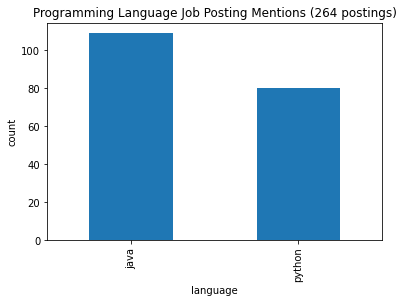

In [177]:
#Now we have mentions, number of mentions of python and java in job postings on indeed.com
#Plotting java vs python mentions
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

mentionsSeries = pd.Series(mentions)

mentionsSeries.plot(kind = "bar")
plt.title("Programming Language Job Posting Mentions (" + str(c+1) +" postings)" )
plt.xlabel("language")
plt.ylabel("count")
plt.show()